In [97]:
from collections import defaultdict
import numpy as np
import pandas as pd
import itertools
import matplotlib.pyplot as plt
import seaborn as sb
import plotly.plotly as py
import plotly.graph_objs as go
%matplotlib inline

class GridPlots:
    """
    Generate plots for the results produced by grid searching Like2Vec
    
    Parameters
    ----------
    hyperParamNames: List; names of all hyperparameters and result
    measure: String; partial title to be used in plots
    exclude: String; hyperparameter to exclude from plots
    
    Attributes
    ----------
    ArrayDict: Dictionary; key is hyperparameter name and value is a list of all relevant hyperparameter data
    combos: List; all unique combinations of 2 of hyperparameters to generate plots for
    df: pandas DataFrame; row is a result containing the hyperparameter data and result
    yaxis: String; name to appear on y or z axis of the plots
                            
    """
    def __init__(self,fileName,hyperParamNames,measure,exclude=""):
        self.ArrayDict = self.generateDict()
        self.measure = measure
        self.exclude = exclude
        self.yaxis = [i for i in hyperParamNames if i in measure][0]
        hyperParamNames = [i for i in hyperParamNames if i not in measure]
        hyperParamNames = [i for i in hyperParamNames if i not in exclude]
        self.df = pd.DataFrame(self.ArrayDict)
        self.combos = [list(i)+[self.yaxis] for i in list(itertools.combinations(hyperParamNames,2))]
        
    def generateDict(self):
        """
        generate dictionary where key is hyperparameter name and value is a list of all relevant hyperparameter data
        """
        t=[]
        d = defaultdict(list)
        
        def fillDict(lst):
            lst = [float(i) for i in lst]
            for i,j in enumerate(self.hyperParamNames):
                d[j].append(lst[i])
            
        with open(self.fileName) as f:
            t+=f.readlines()
        splitArray = [i.rstrip('\n').replace(")","").replace("(","").split(",") for i in t]
        _=map(fillDict,splitArray)
        return d
    
    
    def plot3d(self):
        """
        generate plotly 3d plots for all combinations of hyperparameters
        """
        for i in self.combos:
            if self.exclude in i:
                continue
            print i
            dfN = self.df[i]
            dfMean = dfN.groupby([i[0],i[1]]).mean()
            z = dfMean.unstack(level=-1).as_matrix()
            firstVar = sorted(list(set(list(self.ArrayDict[i[0]]))))
            secondVar = sorted(list(set(list(self.ArrayDict[i[1]]))))
            xmesh,ymesh = np.meshgrid(firstVar,secondVar)
            data = [
                    go.Surface(
                        x=xmesh,
                        y=ymesh,
                        z=z.T
                        )
                    ]
            layout = go.Layout(
                title='%s for %s and %s'%(self.measure,i[0],i[1]),
                autosize=True,
                scene=dict(
                xaxis=dict(
                    title = i[0],
                    gridcolor='Spectral',
                    range=[min(firstVar),max(firstVar)]  
                ),
                yaxis=dict(
                        title = i[1],
                        gridcolor='Spectral',
                        range=[min(secondVar),max(secondVar)]
                ),
                zaxis=dict(
                    title = self.yaxis,
                    gridcolor='Spectral',
                )
                )
        )
        fig = go.Figure(data=data, layout=layout)
        plot_url = py.plot(fig, filename='%s_%s_%s'%(self.measure,i[0],i[1]))
        
    def plotContour(self):
        """
        generate contour plots for all combinations of hyperparameters
        """
        for i in self.combos:
            if self.exclude in i:
                continue
            dfN = self.df[i]
            dfMean = dfN.groupby([i[0],i[1]]).mean()
            Z = dfMean.unstack(level=-1).as_matrix()
            firstVar = sorted(list(set(list(self.ArrayDict[i[0]]))))
            secondVar = sorted(list(set(list(self.ArrayDict[i[1]]))))
            X,Y = np.meshgrid(firstVar,secondVar)
            plt.figure()
            cp = plt.contourf(X, Y, Z.T,cmap="YlOrRd")
            plt.colorbar(cp)
            plt.title('%s Contour Plot Between %s and %s'%(self.measure,i[0],i[1]))
            plt.xlabel(i[0])
            plt.ylabel(i[1])
            plt.show()
            
    def vioPlot(self):
        """
        generate violin plot for each hyperparameter
        """
        params = list(self.ArrayDict.keys())
        params = [i for i in params if i not in self.measure]
        params= [i for i in params if i not in self.exclude]
        sb.set_style("whitegrid")
        for i in params:
            if self.exclude == i:
                continue
            p = sb.violinplot(x=i,y=self.yaxis,data=self.df)#
            #p.savefig("Violin_%s_%s.png"%(name,i))
            plt.title("%s Violin Plot For %s "%(self.measure,i))
            plt.show()
            
    def boxPlot(self):
        """
        generate box plot for each hyperparameter
        """
        params = list(self.ArrayDict.keys())
        params = [i for i in params if i not in self.measure]
        params= [i for i in params if i not in self.exclude]
        sb.set_style("whitegrid")
        for i in params:
            if self.exclude == i:
                continue
            p = sb.boxplot(x=i,y=self.yaxis,data=self.df)#
            #p.savefig("Violin_%s_%s.png"%(name,i))
            plt.title("%s Boxplot Between For %s"%(self.measure,i))
            plt.show()
            
    def allPlot(self):
        """
        generate all 3d, contour, violin and box plots 
        """
        plotFuncs = [self.plot3d,self.plotContour,self.vioPlot,self.boxPlot]
        map(lambda i: i(),plotFuncs)

['Embedding Size', 'Number of Walks', 'RMSE']


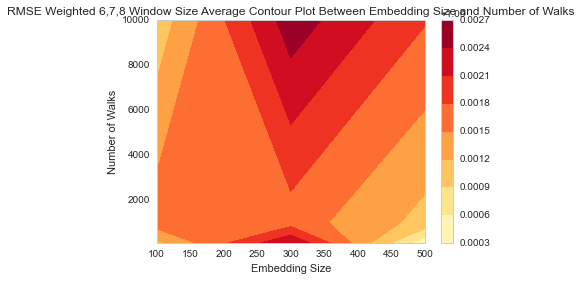

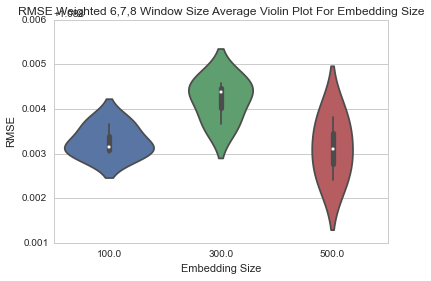

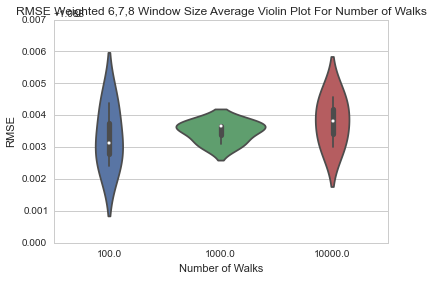

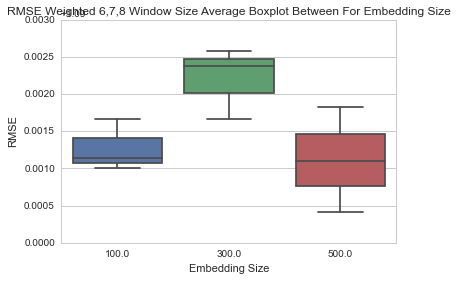

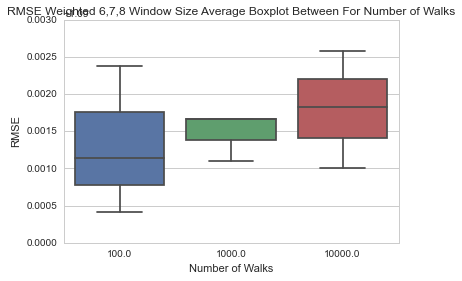

In [99]:
names = ["Embedding Size","Walk Length","Number of Walks","RMSE"]
gp = GridPlots("/Users/jacobbaumbach/l2vGridSearchPlots/rmsew678.txt",names,"RMSE Weighted 6,7,8 Window Size Average",'Walk Length')
gp.allPlot()